In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
!pip install fbprophet


  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9434480 sha256=e437b076adb86c47fc940b793fff7a4b6a9dbe6c8acabc2d17069a88f5ce89d7
  Stored in directory: /root/.cache/pip/wheels/fc/66/ad/951ba2b4576f7364afe7aeea8b0036e38d2179d6773f16d69f
Successfully built fbprophet


Initial log joint probability = -79.4975
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       12036.5      0.018635       3746.38       0.569       0.569      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       12215.9    0.00665954       250.553       0.811       0.811      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       12261.2    0.00414577       540.313      0.3609      0.3609      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     345       12269.4   0.000116872       188.586   3.106e-07       0.001      434  LS failed, Hessian reset 
     399         12274    0.00278353       408.952           1           1      500   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       12292.9    0.00784363    

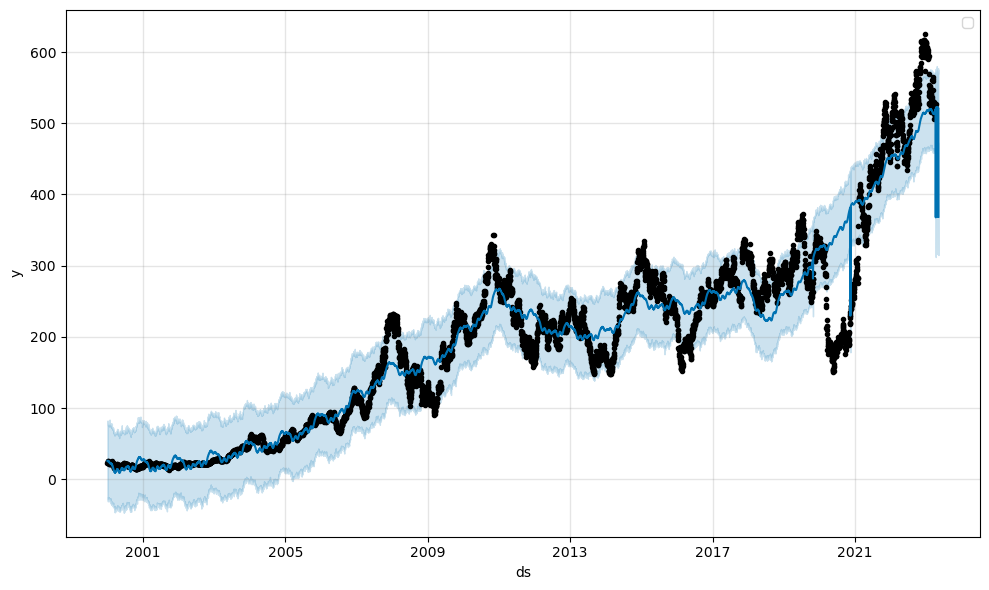

In [13]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/kaggle/input/sbin-till-2023/SBIN.csv')

# Rename columns to 'ds' and 'y'
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})

# Create and fit the model
m = Prophet()
m.fit(df)

# Create future dates to make predictions for
future = m.make_future_dataframe(periods=30)

# Make predictions
forecast = m.predict(future)

# Plot the results
m.plot(forecast)
plt.legend()
plt.show()



In [20]:
!pip install pytz

In [21]:
import pytz

In [26]:
df['ds'] = pd.to_datetime(df['ds'])
timezone = 'Asia/Kolkata'
# df['ds'] = df['ds'].dt.tz_localize(pytz.utc).dt.tz_convert(timezone)
df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize(None)

# Create and fit the model
m = Prophet()
m.fit(df)

# Create future dates to make predictions for
future = m.make_future_dataframe(periods=30)

# Make predictions
forecast = m.predict(future)



Initial log joint probability = -79.4975
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       12025.4     0.0118166        939.75           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       12236.6    0.00706917       1751.19      0.3215      0.3215      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299         12281    0.00611199       391.808      0.8334      0.8334      356   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       12292.3   0.000530345       56.3694           1           1      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       12308.2     0.0124413       214.889      0.8269      0.8269      580   
    Iter      log prob        ||dx||      ||grad||       alpha  

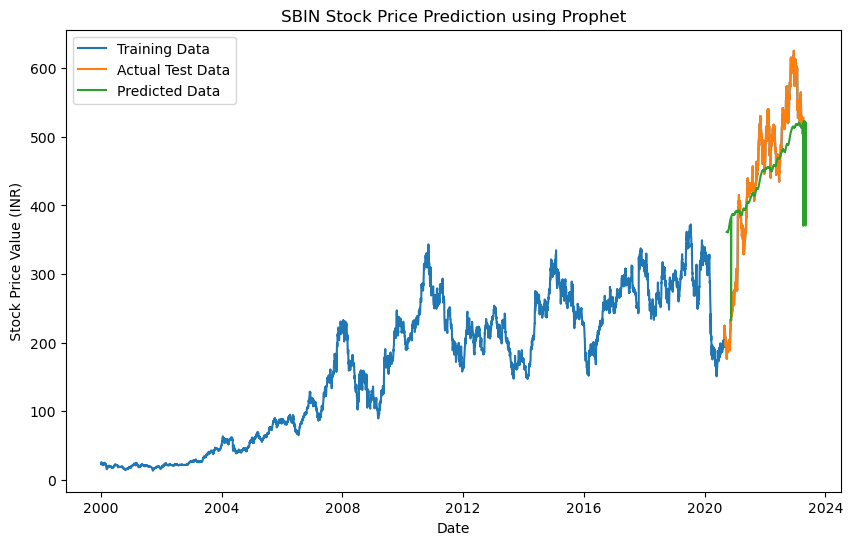

In [44]:
# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(df['ds'], df['y'], label='Training Data')
plt.plot(df['ds'][-650:], df['y'][-650:], label='Actual Test Data')
plt.plot(forecast['ds'][-660:], forecast['yhat'][-660:], label='Predicted Data')
plt.legend()
plt.title('SBIN Stock Price Prediction using Prophet')
plt.xlabel('Date')
plt.ylabel(' Stock Price Value (INR) ')
plt.show()

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Extracting the predicted and true values
forecast_values = forecast['yhat'][-650:].values
true_values = df['y'][-650:].values

# Calculating evaluation metrics
mae = mean_absolute_error(true_values, forecast_values)
mape = np.mean(np.abs((true_values - forecast_values) / true_values)) * 100
mse = mean_squared_error(true_values, forecast_values)
rmse = np.sqrt(mse)
r2 = r2_score(true_values, forecast_values)

print('Mean Absolute Error:', mae)
print('Mean Absolute Percentage Error:', mape)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-Squared:', r2)

Mean Absolute Error: 124.51525734265485
Mean Absolute Percentage Error: 37.80937562614554
Mean Squared Error: 22493.16976328714
Root Mean Squared Error: 149.97723081617136
R-Squared: -0.7279375024325492


In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Extracting the predicted and true values
forecast_values = forecast['yhat'][-650:].values
true_values = df['y'][-650:].values

# Calculating evaluation metrics
mae = mean_absolute_error(true_values, forecast_values)
mape = np.mean(np.abs((true_values - forecast_values) / true_values)) * 100
mse = mean_squared_error(true_values, forecast_values)
rmse = np.sqrt(mse)
r2 = r2_score(true_values, forecast_values)
nrmse = rmse / (np.max(true_values) - np.min(true_values))
wape = np.sum(np.abs(true_values - forecast_values)) / np.sum(np.abs(true_values))
wmape = np.sum(np.abs(true_values - forecast_values) / np.sum(np.abs(true_values))) * 100
# aic = model.aic

print('Mean Absolute Error:', mae)
print('Mean Absolute Percentage Error:', mape)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-Squared:', r2)
print('Normalized Root Mean Squared Error:', nrmse)
print('Weighted Absolute Percentage Error:', wape)
print('Weighted Mean Absolute Percentage Error:', wmape)
# print('Akaike information criterion:', aic)


Mean Absolute Error: 124.51525734265485
Mean Absolute Percentage Error: 37.80937562614554
Mean Squared Error: 22493.16976328714
Root Mean Squared Error: 149.97723081617136
R-Squared: -0.7279375024325492
Normalized Root Mean Squared Error: 0.3339134651101356
Weighted Absolute Percentage Error: 0.2811509753249108
Weighted Mean Absolute Percentage Error: 28.115097532491074


In [58]:
# calculate the AIC value
n = len(df['y'][:-650]) + len(df['y'][-650:])
k = len(m.params)
log_likelihood = -0.5 * np.sum(np.square((forecast['yhat'][:-650]) - train_data['y']) / forecast['yhat_lower'][:-650])
aic = -2 * log_likelihood + 2 * k + (2 * k * (k + 1)) / (n - k - 1)

print('AIC:', aic)

AIC: 39233.9511411972
